<a href="https://colab.research.google.com/github/maruthiprasanna3107948/LuneEtoile_ck/blob/main/LinearRegression_eCommerceData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Content**


1.   Introduction
2.   Understanding the Data
3.   Exploratory Data Analysis (EDA)
     * Overview of the Data
     * Features Distribution
     * Pairwise Relationships
     * Liner Relationships
4.   Data Prepration
     * Defining Features (X) and Traget (Y)
     * Splitting data into Training and Testing Sets
5.   Building and Training the Model
     * Importing and Initializing
     * Fitting the Model
     * Extracting Model Coefficients
6.   Model Evaluation
     * Performance Metrics
     * Analyzing Residuals
     * Interpreting coefficients
7.   Conclusions and Business Recommendations
     * Key Insights
     * Business Recommendations
     * Final Thoughts
* Appendix








**1. Introduction**

<br>In this project, we dive into the world of eCommerce analytics by tackling a real-world-inspired challenge using linear regression. An eCommerce company based in New York City, known for selling clothing online and offering in-store styling services, seeks to optimize its digital strategies. Customers interact with the company through a mobile app, website, or in-store sessions with personal stylists, followed by purchases through digital platforms.<br>

The company’s key question is: Should it focus more on improving the mobile app or the website experience? As data scientists, our goal is to analyze customer data, build a predictive linear regression model, and provide actionable insights to aid this business decision.<br>

Using Python and libraries such as Pandas, Seaborn, and Scikit-Learn, we’ll explore, visualize, and model the data to arrive at meaningful conclusions. Let’s get started!<br>




**2. Understanding the Dataset**<br><br>
The dataset for this project, ecommerce_customers.csv, contains 500 rows and 8 columns, representing customer interactions and demographic details. While the data is artificially generated, it closely resembles real-world eCommerce scenarios.<br><br>
Key columns in the dataset include:<br>
* **Email:** Customer email address (text data).
* **Avatar:** The preferred avatar image of the customer (text data).
* **Average Session Length:** The average time spent by a customer during sessions in minutes (numerical).
* **Time on App:** Average time a customer spends using the mobile app in minutes (numerical).
* **Time on Website:** Average time a customer spends on the website in minutes (numerical).
* **Length of Membership:** The number of years the costomer has been a member (Numerical)
* **Yearly Amount Spent:** The total yeraly expenditure in dollars (Numerical, Target variable)<br>

Before going into model building we will analyze the relationship between features to uncover trends and patterns, seeting the stage for meaningful predictions


**3. Exploratort Data Analysis**<br><br>
In this section, we explore the relationships between the features in the dataset to identify trends and key predictors of Yearly Amount Spent.<br><br>
**Overview of Data**<br>
We begin by loading the dataset and examining its structure:


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset
customers = pd.read_csv('/content/EcommerceCustomers.csv')

# Checking the first five rows
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


The dataset contains the following numerical features:<br><br>
* Average Session Length
* Time on App
* Time on Website
* Length of Membership
* **Target Variable:** Yearly amount spent<br><br>

We confirm these columns and their data types using the .info() method:

In [ ]:
# Checking dataset information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Features Distribution**<br><br>
Analyzing feature distribution helps us understand the data spread, detect anamolies, and identify potential transformations needed for modelling. It provides insights into variability, central tendencies, and patterns across features, ensuring a solid foundation for building as effective regression model. Below, we examine the distribution of key numerical features. <br><br>
Let's create histograms for all numerical features:

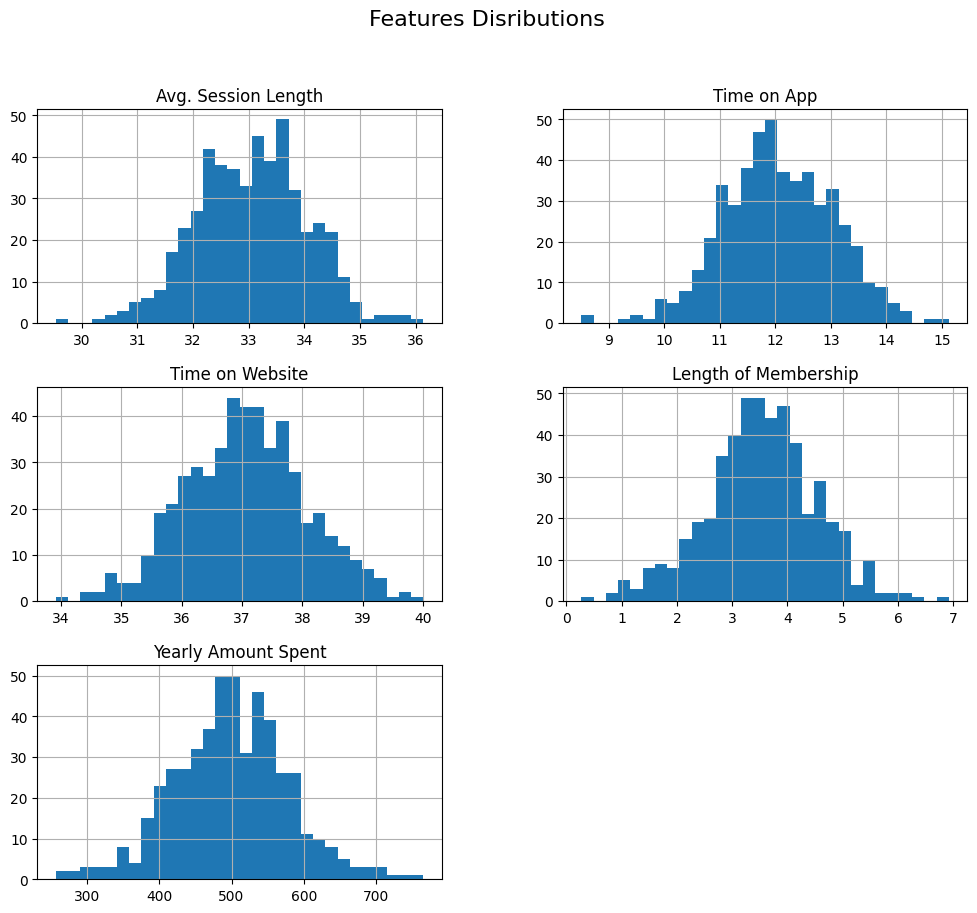

In [ ]:
# Plotting histograms for all numerical features
customers.hist(bins=30,figsize=(12,10))
plt.suptitle('Features Disributions', fontsize=16)
plt.show()

The histograms below represent the distribution of the numerical features in dataset:<br><br>
1. **Avg. Session Length:**
   * The distribution is approximately normal, with most values clustered aroung 33 minutes
   * Slight variation suggests consistent session durations among users
2. **Time on App:**
   * The data follows a roughly normal distributin, centred around 12 minutes
   * This indicates that the majority of users spend similar amounts of time on the app
3. **Time in Website:**
   * The distribution is normal, with values peaking around 37 minutes.
   * However, compared to the app, website's engagement appears slightly less variable.
4. **Length of Membership:**
   * This feature shows a slightly right-skewed normal distribution, with most users having membership duration of 3 to 4 yeras.
   * The feature is a strong candidate for predecting user behavious overtime.
5. **Yearly Amount Spent (Target Variable):**
   * The traget variable follows a normal distribution, with spending peaking around $500 anually
   * The data suggets a broad range of customer spending habits, with some outliers spending significantly more or less.<br><br>
**Key Insights:**
* ALl features show relatively normal distribution, which simplifies regression modelling,
* **Length of Membership** and **Time on App** distribution suggest significant variability that could influence the traget(**Yearly Amount Spent**), reinforcing their importance as predictors.<br><br>

**Pairwise Relationships**<br>
Using Seaborn's **pairplot**, we visualize between numerical features:


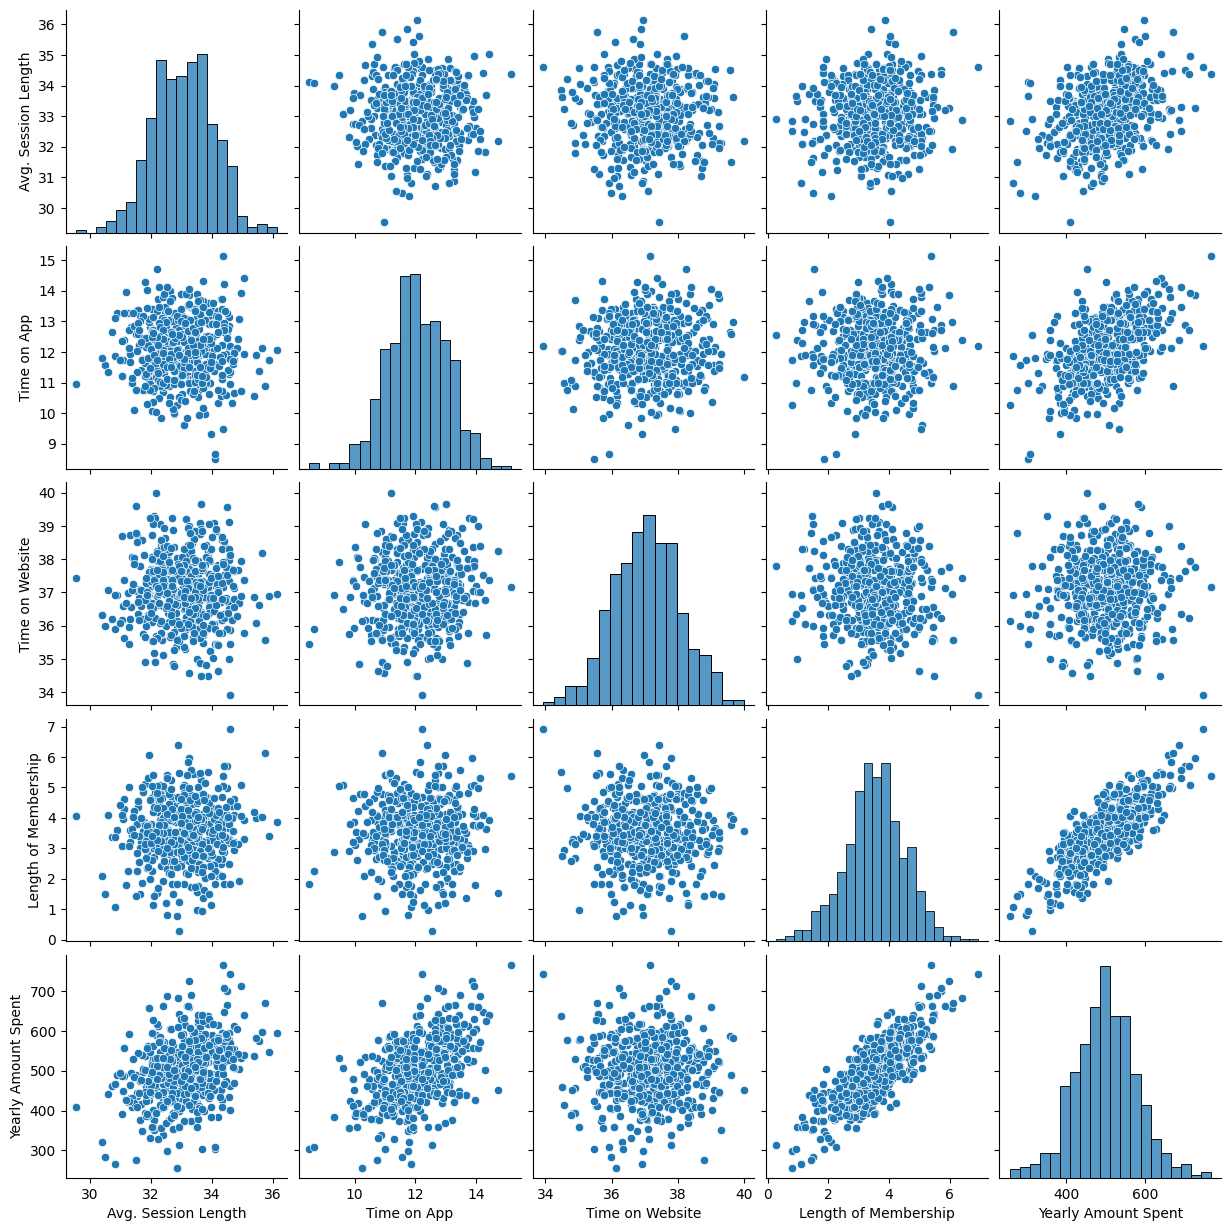

In [ ]:
# Pairplot of numerical features
sns.pairplot(customers)
plt.show()

This **pairplot** provides an overview of the relationships and distributions of the numerical features in the datasets:<br><br>
1. **Digonal (Histograms):**
   * Each featur has a histogram along the digonal, showing its distribution.
   * Most features (**Avg Session Length**, **Time on App**, **Time on Website**, and **Length of Membership**) follow a relatively normal distribution.
   * The target variable (**Yearly Amount Spent**) is also approximately normal, with a slight right skew.
2. **Feature Relationships (Scatterplots):**
   * **Length of Membership Vs. Yearly Amount Spent:** Strong positive correlation, indicating that longer memberships are associated with higher yeraly spending.
   * **Time on App vs. Yearly Amount Spent:** Moderate positive correlation, showing that increased app usage corresponds to higher spending.
   * **Time on Website vs. Yearly Amount Spent:** Weak or no noticeable correlation.
   * **Avg Session Length vs. Yearly Amount Spent:** Slight positive correlation, though less pronounced compared to Length of Membership.
3. **Other Relationships:**
   * **Time on Website** and **Time on App** show no strong interaction, suggesting these are independent behaviours.<br><br>

**Conclusions:** The key predictors of **Yearly Spent** are **Length of Membership** and **Time on App**. These insights will guide feature selection and modelling efforts.<br><br>

**Linear Relationship**<br>
To validate the correlation between **Length of Membership** and **Yearly Amount Spent**, we create a linear regression plot:


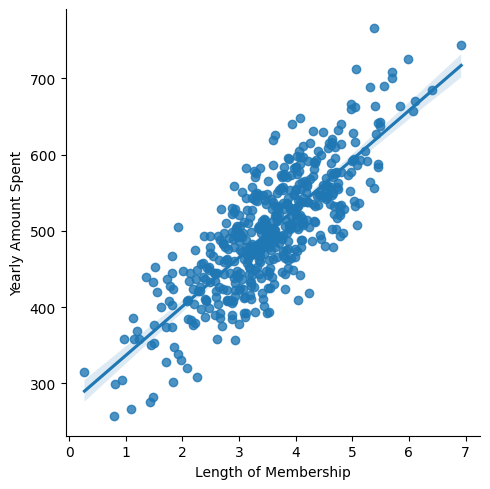

In [ ]:
sns.lmplot(x='Length of Membership', y = 'Yearly Amount Spent',data=customers)
plt.show()

A strong linear relationship confirms that Length of Membership is a key predictor of spending.<br><br>

**4. Data Prepration**<br>

Before building our regression model, we need to prepare the data. This includes separating the target variable from the features, selecting relevant columns, and splitting the data into training and testing sets. Here are the steps we followed:<br>
**Defining Features (X) and Target (y)**<br>
The **Yearly Amount Spent** column is our target variable (y), while the numerical features (**Avg. Session Length**, **Time on App**, **Time on Website**, and **Length of Membership**) form our feature matrix (X).

In [ ]:
# Defining the target variable and features
X = customers[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']


**Spitting Data into Training and Testing Sets**<br><br>
We use Scikit-Learn’s **train_test_split** method to split the data into training (70%) and testing (30%) sets. This ensures the model is trained on one subset of data and evaluated on another to prevent overfitting.


In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

* test_size=0.3: Allocate 30% of the data for testing
* random_state=101.<br>

**5. Building and Training the Model**<br>
With the data prepared, we now move on to building and training our linear regression model. This involves creating an instance of the linear regression algorithm, fitting it to the training data, and preparing it for evaluation.<br>
**Importing and Initilizing the Model**

We use Scikit-Learn’s **LinearRegression** class to create our regression model.




In [ ]:
# Importing the Liner Regression model
from sklearn.linear_model import LinearRegression

# Creating an instance of the Linear Regression model
lm = LinearRegression()

**Fitting the Model**<br>
The nect step is to train the model using the training data(**X_train** and **y_train**). The fit method adjusts the model parameters to minimize the error between predicted and actual values.


In [ ]:
# Fitting the nodel to the training data
lm.fit(X_train, y_train)

LinearRegression()

The model now understands the relationship between the features (**X_train**) and the target (**y_train**)<br><br>
**Extracting Model Coefficients**<br>
Once the model is trained, we can extract its coefficients to understand how each feature contributes to the predictions.


In [ ]:
# Extracting the coefficients
coefficients = lm.coef_

# Printing coefficients
print(coefficients)

[25.98154972 38.59015875  0.19040528 61.27909654]


The coefficients correspond to each feature ad indicate their impact on the target variable (**Yearly Amount Spent**). We will interpret these coefficients in the evaluation section.<br><br>


**6. Model Evaluation**<br>
Model evaluation is a crucial step in understanding how well the linear regression performs on unseen data. This section includes assessing performance metrics, analyzing residuals and interpreting coefficients to draw actionable insights.<br><br>
**Performance Metrics**<br>
To evaluate the model, we calculate thr following metrics:<br><br>
 * **Mean Absolute Error:** The average magnitude of errors in predictions.
 * **Mean squared Error(MSE):** penalizes larger errors by squaring them.
 * **Root Mean squared Error (RMSE):** The square root of MSE, representing errors in the same units as the target variable.
 * **R2 Score:** Explains the proportion of variance in the target variable captured by the model.






In [ ]:
# Importing performance metrics libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predection on the test data
predections = lm.predict(X_test)

# Calculating the performance metrics

mae = mean_absolute_error(y_test, predections)
mse = mean_squared_error(y_test, predections)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predections)

# Printing metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Mean Root Squared Error: {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error: 7.228148653430826
Mean Squared Error: 79.81305165097427
Mean Root Squared Error: 8.933815066978624
R2 Score: 0.9890046246741234


The evaluation metrics indicate that the linear regression model performs exceptionally well:<br><br>
* **Mean Absolute Error (7.23):** On an average, predections deviate from the absolute value by about $ 7.23.
* **Mean Squared Error (79.81)** and **Root Mean Squared Error (8.93):** Errors are small, showing the model's predections are close to the actual values.
* **R2 Scores (0.989):** THe model explains 98.9% of the variance in yearly spending, indicating very strong fit.<br><br>

These results confirms the model's high accuracy and reliable for predecting customer spending.<br><br>


**Analyzing Resisuals**<br>
Residuals are the differences between actual and predected values. Analyzing them helps verify if the model meets assumptions like linearity and normality.


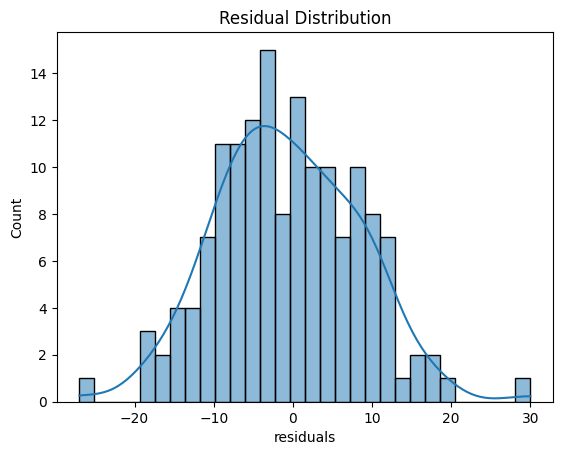

In [ ]:
# Ploting the residuals
residuals = y_test - predections

# Histogram of residuals
sns.histplot(residuals, kde=True, bins=30)
plt.title('Residual Distribution')
plt.xlabel('residuals')
plt.show()

The residuals appear normally distributed, confirming that the model is well-fitted to the data. There is no evident skewness, reinforcing the validity of the model's predections.<br><br>

**Interpreting Coefficients**<br>
The coefficients from the linear regression model provide insights into how each feature impacts the traget variable(**Yearly Amount Spent**).


In [ ]:
# Creating a DataFrame for coefficients
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
print(coeff_df)

                      Coefficients
Avg. Session Length      25.981550
Time on App              38.590159
Time on Website           0.190405
Length of Membership     61.279097


**Interpretation:**
* **Avg. Session Length:** A one-unit increase in session length is associated with an increase of approximately 26 dollars  in yearly spending.
* **Time on App:** Each additional minute spent on the app results in about 38 dollars more spenting annually
* **Time on Website:** This feature has a minor impact, with a one-unit increase corresponding to only 0.19 dollars more spending.
* **Length of Membership:** The strongest predictor—each additional year of membership leads to a 61 dollars increase in yearly spending<br><br>


These insights suggest that while both the app and membership duration significantly influence spending, the website has less impact. This can inform business strategies to focus efforts on enhancing the app and maintaining long-term customer relationships.<br><br>


Overall, the model demonstrates strong predictive capabilities, as evidenced by low error metrics and a high R² score. Residual analysis confirms a good fit, while coefficient interpretation highlights the features most associated with customer spending. These findings provide a data-driven foundation for actionable<br><br>


**7. Conclusion and Business Recommendations**<br>
The linear regression model built for this project has demonstrated exceptional performance, with an R² score of 0.989 on the test data, indicating that the model explains 98.9% of the variance in yearly customer spending. The analysis of residuals confirms a good model fit, and the interpretation of coefficients highlights key features driving customer behaviour.<br><br>


**Key Insights**
* **Length of Membership** is the most significant predictor, with each additional year of membership leading to an average increase of 61 dollars in yearly spending. This underscores the importance of retaining customers over time.
* **Time on App** is also a strong predictor, with each additional minute spent on the app increasing yearly spending by approximately 38 dollars. This highlights the app’s significant role in customer engagement and spending.
* **Time on Website** has minimal impact, contributing only $0.19 for each additional minute spent, suggesting it is less influential in driving revenue compared to the app.<br><br>


**Business Recommendations**<br><br>
Based on these findings, the company should consider the following actions:<br><br>

1. **Focus on Mobile App Development:** Invest in improving the app’s user experience and adding features that increase engagement, as the app has a stronger correlation with customer spending.
2. **Enhance Customer Retention Strategies:** Given the substantial impact of membership length, prioritize retention initiatives such as loyalty programs, personalized recommendations, and exclusive offers to encourage long-term relationships with customers.
3. **Reassess Website Strategy:** While the website contributes less to revenue, it may still play a supporting role. Evaluate its purpose (e.g., as a complementary channel for browsing or customer service) and consider whether to optimize specific aspects for better synergy with the app.<br><br>


**Final Thoughts**<br>
This analysis provides a data-driven foundation for strategic decision-making. However, further steps, such as cost-benefit analyses of app and website improvements, should be undertaken to ensure optimal resource allocation. By focusing on key areas like mobile app enhancements and customer retention, the company can maximize revenue growth and long-term customer value.<br><br>


**Data Source:** https://www.kaggle.com/datasets/srolka/ecommerce-customers/data




